In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
from sklearn import tree 
from IPython.display import Image
import pydot
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data=pd.read_csv("D:/Coding_Project/Python_KaggleChallenge_Titanic/Data/train.csv")
test_data=pd.read_csv("D:/Coding_Project/Python_KaggleChallenge_Titanic/Data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

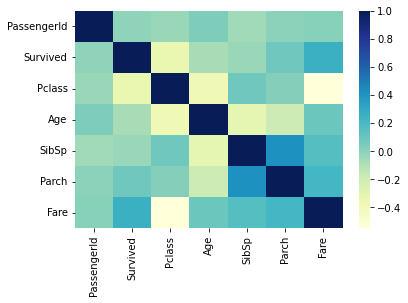

In [4]:
sns.heatmap(train_data.corr(),cmap='YlGnBu')

In [5]:
train_data = train_data.drop(['Name','Ticket','Cabin'], axis=1)
test_data = test_data.drop(['Name','Ticket','Cabin'], axis=1)

In [6]:
train_data.Sex=train_data.Sex.astype('category').cat.codes
test_data.Sex=test_data.Sex.astype('category').cat.codes
train_data.Embarked=train_data.Embarked.astype('category').cat.codes
test_data.Embarked=test_data.Embarked.astype('category').cat.codes

In [7]:
train_data['Age'].fillna(int(train_data['Age'].mean()), inplace=True)
test_data['Age'].fillna(int(test_data['Age'].mean()), inplace=True)
train_data['Embarked'].fillna(int(train_data['Embarked'].mean()), inplace=True)
test_data['Fare'].fillna(int(test_data['Fare'].mean()), inplace=True)

In [8]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,29.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [9]:
features=list(train_data.columns[2:])
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [10]:
y=train_data['Survived']
x=train_data[features]
clf=RandomForestClassifier(n_estimators=10)
clf=clf.fit(x,y)

In [11]:
correct = 0.
x_1=np.array(train_data.drop(['PassengerId'],1).drop(['Survived'],1).astype(float))
y = np.array(train_data['Survived'])
for i in range(len(x_1)):
    predict_me = np.array(x_1[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

<ipython-input-11-20bb71deca48>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_1=np.array(train_data.drop(['PassengerId'],1).drop(['Survived'],1).astype(float))
<ipython-input-11-20bb71deca48>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_1=np.array(train_data.drop(['PassengerId'],1).drop(['Survived'],1).astype(float))


0.9708193041526375


In [12]:
test_features=list(test_data.columns[1:])
test_data_x=test_data[test_features]
prediction=clf.predict(test_data_x)

In [14]:
column1  = test_data.PassengerId
df = pd.DataFrame(column1, columns =['PassengerId'])
df1 = pd.DataFrame(prediction, columns =['Survived'])
result = pd.concat([df,df1],axis=1, join="inner")
visualized=test_data
merge=visualized.merge(result, how='inner', on='PassengerId')
merge.Survived=merge.Survived.astype('object')
fig = px.scatter(merge, x="PassengerId", y="Fare", color="Survived")
fig.show()
fig.write_image("Prediction_RandomForest.png")

In [15]:
result.to_csv('Prediction_RandomForest.csv',encoding='utf-8-sig',index=False)